Họ và tên: Đặng Hữu Trang.
Lớp: Phân tích dữ liệu.
Ngày sinh: 09/10/2001.
SĐT: 0337596730.
Email: trang9102001@gmail.com.

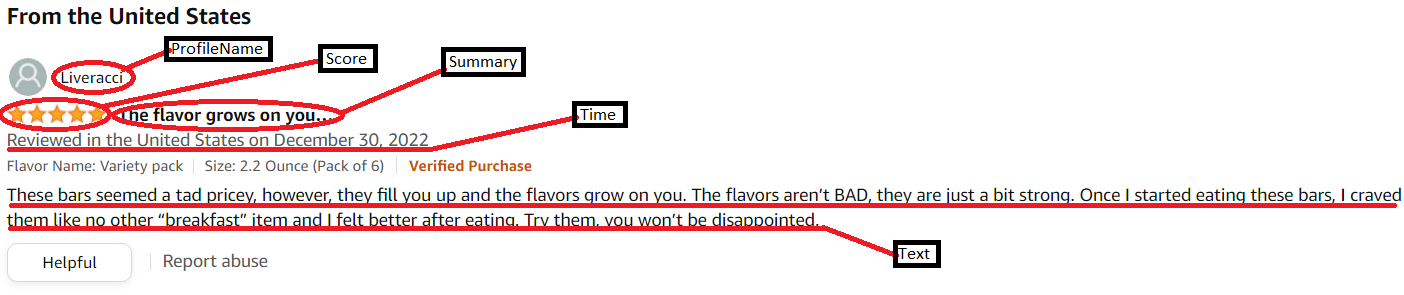

In [5]:
import pandas as pd
import time
import datetime
import smtplib
import requests
from bs4 import BeautifulSoup

In [6]:
search_query="food"
base_url="https://www.amazon.com/s?k="
url=base_url+search_query#url cơ sở và từ truy vấn
url

'https://www.amazon.com/s?k=food'

In [7]:
#vượt qua tác nhân người dùng và chuyển người giới thiệu
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36','referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}


In [8]:
#sử dụng thư viện requests, gửi yêu cầu bằng url
search_response=requests.get(url,headers=header)
#kiểm tra mã trạng thái
search_response.status_code


200

In [9]:
#văn bản phản hồi
search_response.text


'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

In [10]:
search_response.cookies#có thể dùng để truy vấn


<RequestsCookieJar[Cookie(version=0, name='i18n-prefs', value='USD', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1704544264, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id', value='142-6702119-8919641', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1704544264, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id-time', value='2082787201l', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1704544264, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='sp-cdn', value='"L5Z9:VN"', port=None, port_specified=False,

## Hàm lấy nội dung trang cần truy vấn

In [11]:
cookie={} 
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:#nếu yêu cầu thành công,trả về trang html
        return page
    else:
        return "Error"

## Hàm lấy nội dung của các trang sản phẩm riêng lẻ bằng cách sử dụng số 'data-asin' (Product ID)

In [12]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

## Hàm chuyển liên kết 'xem tất cả đánh giá' và trích xuất nội dung

In [13]:
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

## Khai thác đánh giá sản phẩm trang đầu tiên

In [14]:
product_names=[]
response=getAmazonSearch('food')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): #tìm tất cả asin number
    product_names.append(i.text) #thêm vào list


https://www.amazon.com/s?k=food


In [15]:
product_names

['Jaccard Original Combo Pack with Wooden Gift Box, 12"/19", PigTail Food Flipper, Stainless Steel',
 'Goldfish Crackers Big Smiles with Cheddar, Colors, and Pretzel Crackers, Snack Packs, 30 CT Variety Pack Box',
 'Quaker Instant Oatmeal, 4 Flavor Variety Pack, Individual Packets, 48 Count',
 'Pop-Tarts Toaster Pastries, Breakfast Foods, Kids Snacks, Variety Pack (60 Pop-Tarts)',
 "Grandma's Cookies Variety Pack of 30",
 "Mott's Fruit Flavored Snacks, Assorted Fruit, Pouches, 0.8 oz, 40 ct",
 'Quaker Large Rice Cakes, Gluten Free, 3 Flavor Variety Pack, 6 Count',
 "Nature Valley Crunchy Granola Bars, Oats 'n Honey, 1.49 oz, 24 ct, 48 bars",
 'HORMEL COMPLEATS Roast Beef & Mashed Potatoes With Gravy Microwave Tray, 9 Ounce (Pack of 6)',
 'Quaker Chewy Granola Bars, Chewy & Dipps Variety Pack, (58 Bars)',
 'Wonderful Pistachios, Roasted and Salted Nuts, 1.5 Ounce Bag (Pack of 9)',
 'HORMEL COMPLEATS Chicken Alfredo Microwave Tray, 10 oz. (6 Pack)',
 'Spam Classic, 12 Ounce Can (Pack of 

In [16]:
len(product_names)


59

## Lấy số data-asin
Cách lấy số data-asin cũng tương tự như cách lấy tên sản phẩm. Chỉ các chi tiết thẻ phải được thay đổi trong findAll()

In [17]:
data_asin=[]
response=getAmazonSearch('food')
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",{'class':"sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=food


In [18]:
response.status_code


200

In [19]:
data_asin

['B01GQ5GQEG',
 'B01KMHY4KM',
 'B07YP58GX8',
 'B076BYR9JP',
 'B00KRFL5SO',
 'B01J14K2W6',
 'B08NBF5VCH',
 'B001EQ5AVI',
 'B01LNKHDAK',
 'B071NM2QK5',
 'B000OU1Z5A',
 'B001EQ5NHE',
 'B087Z9T1CN',
 'B084RDDFGR',
 'B07MTSNGHP',
 'B07C2SVB83',
 'B073QMN75M',
 'B06Y446KPY',
 'B019TUCOF0',
 'B00HO5IS8A',
 'B07ZDWLGQH',
 'B07ZDX292M',
 'B0B6S4XR9C',
 'B07WT6K984',
 'B01JTDG084',
 'B07ZS9XR5D',
 'B07VQ69WP5',
 'B004164SRA',
 'B00HC767P6',
 'B00HC7633C',
 'B071DVC5TC',
 'B00HFC2E82',
 'B0872ZMXBG',
 'B07PYLVZ95',
 'B0757NV5D5',
 'B01JCNEIC6',
 'B000OUNXXW',
 'B08ZKQTSBP',
 'B01073OGJA',
 'B00DHFJ9ZW',
 'B000GPTC8U',
 'B083JZW7ZW',
 'B00U1RKGOW',
 'B00IAE6S1I',
 'B007Y6P7ZG',
 'B078D7MGY5',
 'B07MJL8NXR',
 'B07L4RJD3L']

In [20]:
len(data_asin)


48

## Trích xuất liên kết 'xem tất cả các đánh giá' cho từng sản phẩm trong trang

In [22]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])
        

https://www.amazon.com/dp/B01GQ5GQEG
https://www.amazon.com/dp/B01KMHY4KM
https://www.amazon.com/dp/B07YP58GX8
https://www.amazon.com/dp/B076BYR9JP
https://www.amazon.com/dp/B00KRFL5SO
https://www.amazon.com/dp/B01J14K2W6
https://www.amazon.com/dp/B08NBF5VCH
https://www.amazon.com/dp/B001EQ5AVI
https://www.amazon.com/dp/B01LNKHDAK
https://www.amazon.com/dp/B071NM2QK5
https://www.amazon.com/dp/B000OU1Z5A
https://www.amazon.com/dp/B001EQ5NHE
https://www.amazon.com/dp/B087Z9T1CN
https://www.amazon.com/dp/B084RDDFGR
https://www.amazon.com/dp/B07MTSNGHP
https://www.amazon.com/dp/B07C2SVB83
https://www.amazon.com/dp/B073QMN75M
https://www.amazon.com/dp/B06Y446KPY
https://www.amazon.com/dp/B019TUCOF0
https://www.amazon.com/dp/B00HO5IS8A
https://www.amazon.com/dp/B07ZDWLGQH
https://www.amazon.com/dp/B07ZDX292M
https://www.amazon.com/dp/B0B6S4XR9C
https://www.amazon.com/dp/B07WT6K984
https://www.amazon.com/dp/B01JTDG084
https://www.amazon.com/dp/B07ZS9XR5D
https://www.amazon.com/dp/B07VQ69WP5
h

In [23]:
len(link)


67

## Các liên kết 'xem tất cả bài đánh giá'. 
Sử dụng liên kết này cùng với số trang, ta có thể trích xuất các đánh giá trong bất kỳ số lượng trang nào cho tất cả các sản phẩm

In [24]:
link


['/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Pop-Tarts-Four-Flavor-Variety-Count/product-reviews/B07YP58GX8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Pop-Tarts-Four-Flavor-Variety-Count/product-reviews/B07YP58GX8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Grandmas-Cookies-Variety-Pack-Count/product-reviews/B076BYR9JP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Grandmas-Cookies-Variety-Pack-Count/product-reviews/B076BYR9JP/ref=cm_cr

## Crawl

In [ ]:
reviewlist = []

for j in range(len(link)):
    try:
        for k in range(100):
            response=Searchreviews(link[j]+'&pageNumber='+str(k))
            soup=BeautifulSoup(response.content)
            reviews = soup.findAll('div', {'data-hook': 'review'})
            for i in reviews:
                review = {
                #'ProductID' : i.find('span', {'"data-state"="asin:"',}),
                #'UserId ': i.find('div', {'data-hook': 'id'}),
                'Product': soup.title.text.replace('Amazon.com: Customer reviews:', '').strip(),
                'ProfileName': i.find('span', {'class':'a-profile-name'}).text.strip(),
                #'Helpfulness Numerator': i.find('span',{'data-hook':'helpful-vote-statement'}).strip(),
                'Score': float(i.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', ' ').strip()),
                'Time': i.find('span',{'data-hook':'review-date'}).text.strip(),
                'Summary': i.find('a', {'data-hook': 'review-title'}).text.strip(),
                'Text': i.find('span', {'data-hook': 'review-body'}).text.strip(),
                }
                reviewlist.append(review)
    except:
        pass

https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
http

https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5

https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4

https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/Pepperidge-Farm-Goldfish-Crackers-Classic/product-reviews/B01GQ5GQEG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9

https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/Quaker-Instant-Oatmeal-Variety-Breakfast/product-reviews/B01KMHY4KM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
http

In [ ]:
reviewlist

In [ ]:
df = pd.DataFrame(reviewlist)
df.shape
df.to_csv('AMZ-fine-food-review.csv')
